In [ ]:
# Load the necessary R library
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Create a data frame with the annual electricity demand in Greece. The data has been taken from IPTO's (Independent Power Transmission Operator) annual reports
total_demand<-c(53597,55253,56310,53490,53545,52915,52611,50664,50228,51335,51212,51932,51462,52101,49968,52329,50688)
dates_d<-c("2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022")
demand<-data.frame(total_demand,dates_d)
demand

total_demand,dates_d
<dbl>,<chr>
53597,2006
55253,2007
56310,2008
53490,2009
53545,2010
52915,2011
52611,2012
50664,2013
50228,2014


In [ ]:
# Convert the 'dates_d' column in the 'demand' data frame from character strings to POSIXct date-time objects, using the specified date-time format
demand$dates_d <- as.POSIXct(demand$dates_d, format="%Y-%m-%d %H:%M:%S")

In [ ]:
# Convert the 'total_demand' column from the demand data frame into a time series object named 'demand_ts'. This time series object can then be used for time series analysis and forecasting
demand_ts <- ts(demand$total_demand, start = c(2006, 1),frequency = 1)
demand_ts

A Time Series:
 [1] 53597 55253 56310 53490 53545 52915 52611 50664 50228 51335 51212 51932
[13] 51462 52101 49968 52329 50688

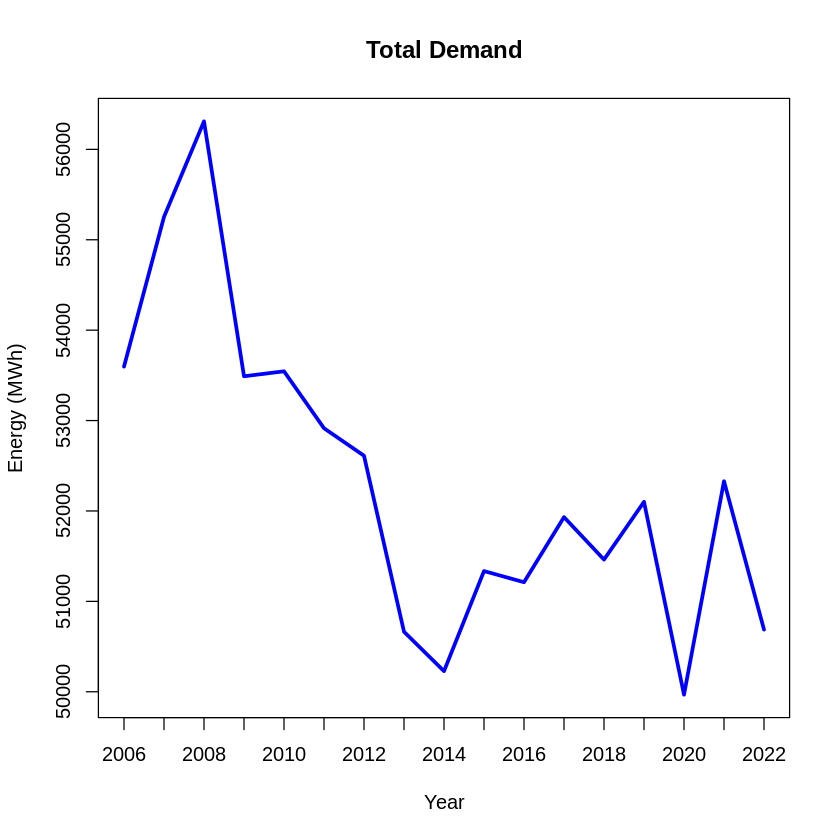

In [ ]:

plot(demand_ts, type='l', col='blue', lwd=3,
     xlab='Year', ylab='Energy (MWh)', main='Total Demand', xaxt='n')

start_year <- start(demand_ts)[1]
end_year <- end(demand_ts)[1]

axis(1, at=seq(start_year, end_year, by=1), labels=seq(start_year, end_year, by=1))

In [ ]:
# Install the necessary package to start the time series analysis and forecasting
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



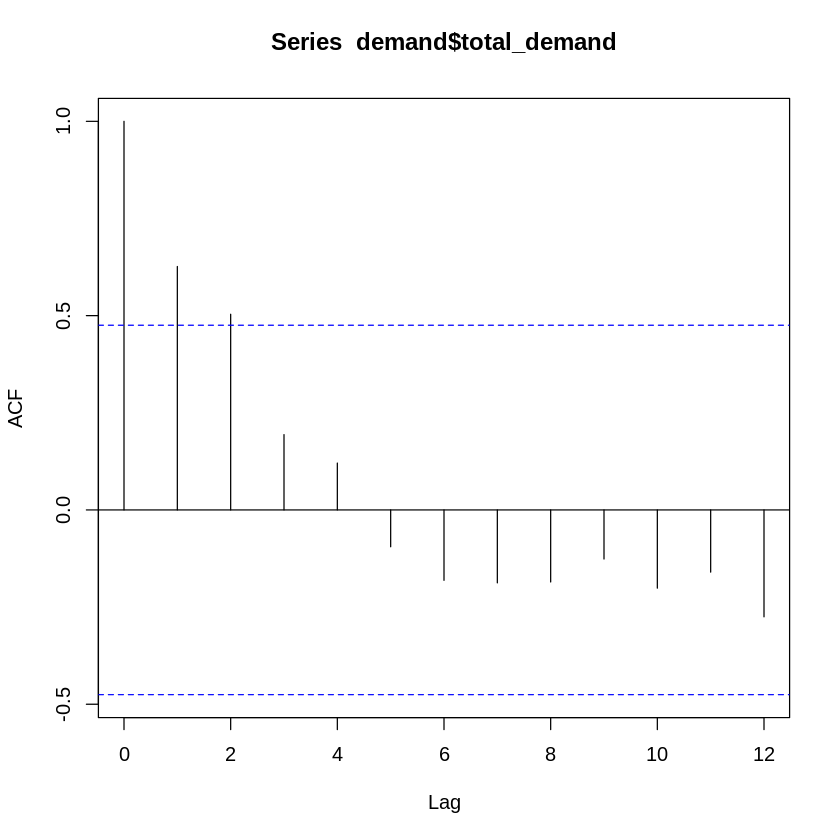

In [ ]:
# At this step I compute and plot the acf function in order to check the time series stationarity
acf_plot <- acf(demand$total_demand)
plot(acf_plot)

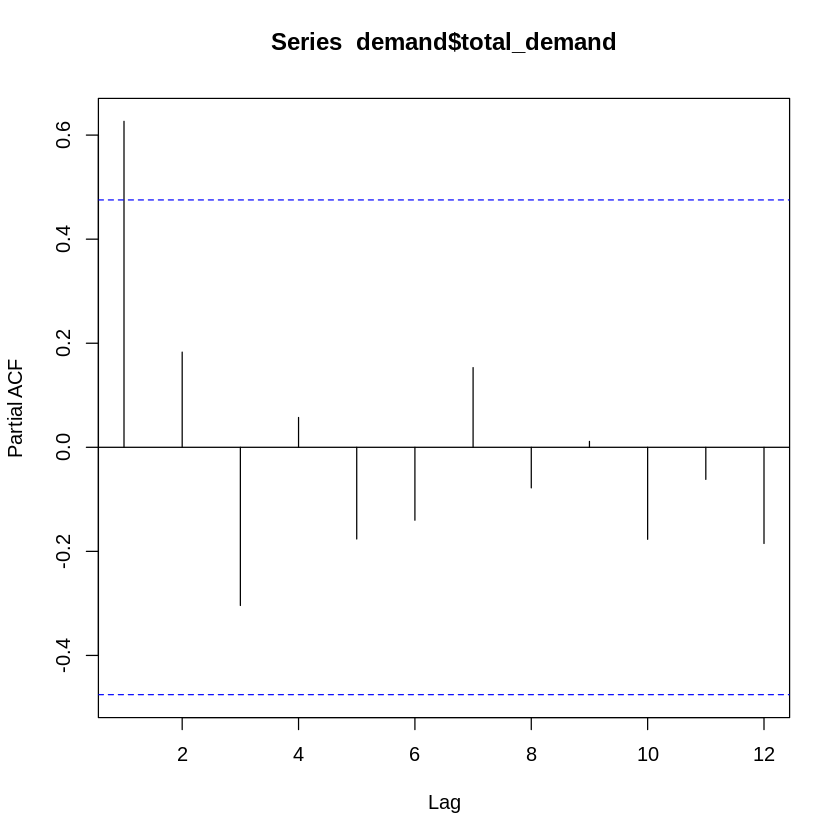

In [ ]:
# PACF Plot
pacf_plot <- pacf(demand$total_demand)
plot(pacf_plot)

From the ACF and PACF plots, we notice that the time series is non-stationary. In order to confirm this conclusion, we will do an ADF and a KPSS test

In [ ]:
library(tseries)

# ADF Test
adf_test <- adf.test(demand$total_demand)

# KPSS Test
kpss_test <- kpss.test(demand$total_demand)
adf_test
kpss_test

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  demand$total_demand
Dickey-Fuller = -1.9108, Lag order = 2, p-value = 0.6064
alternative hypothesis: stationary



	KPSS Test for Level Stationarity

data:  demand$total_demand
KPSS Level = 0.4695, Truncation lag parameter = 2, p-value = 0.04854


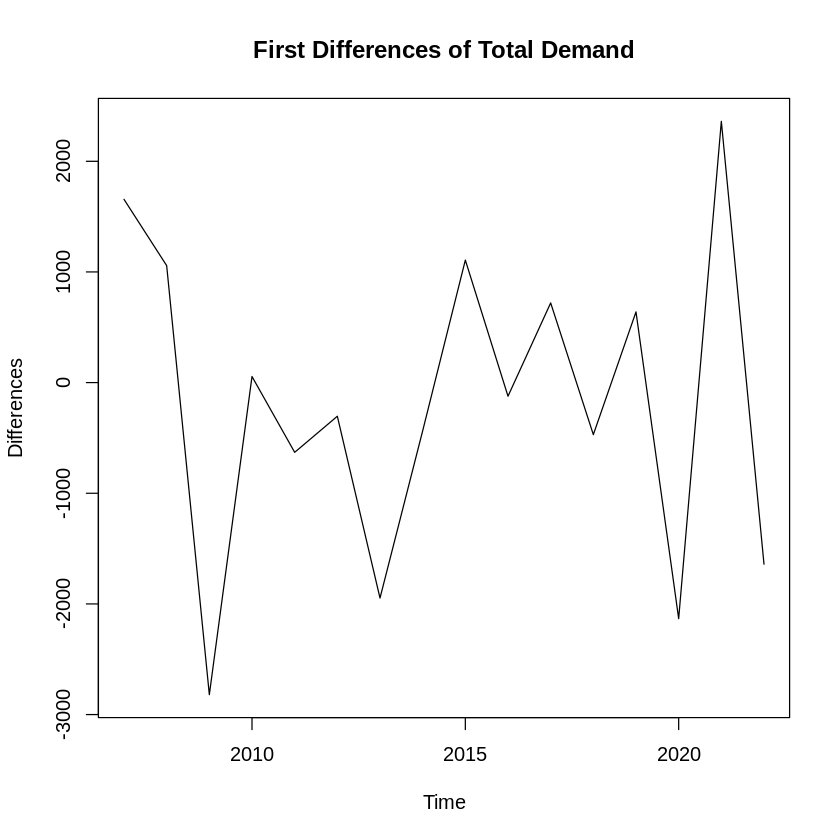

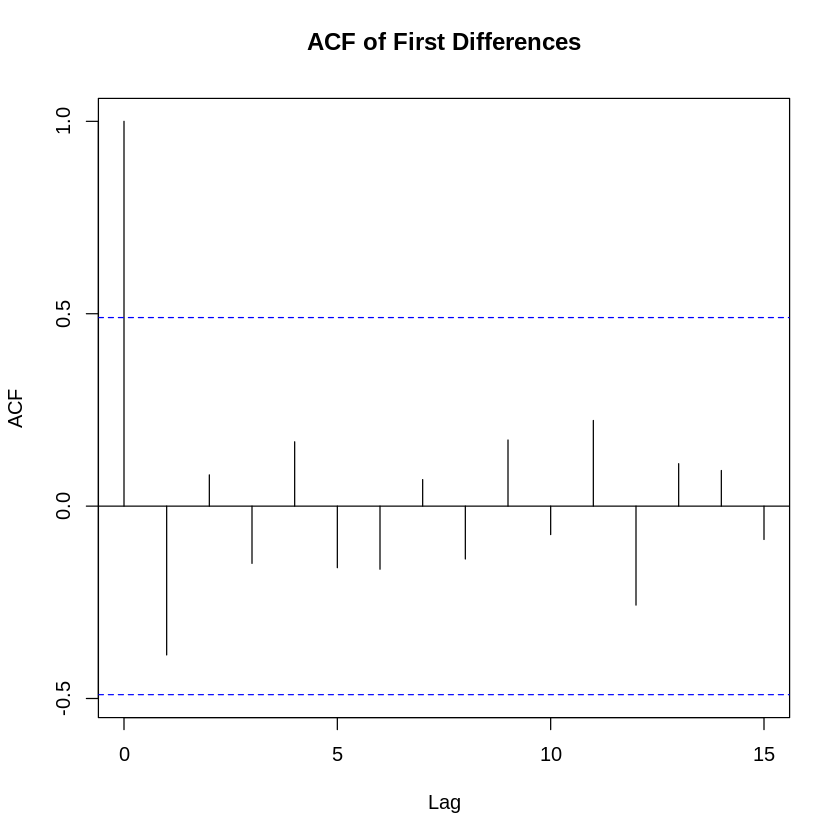


	Augmented Dickey-Fuller Test

data:  diff_total_demand
Dickey-Fuller = -2.9139, Lag order = 2, p-value = 0.2242
alternative hypothesis: stationary



Warning message in kpss.test(diff_total_demand):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  diff_total_demand
KPSS Level = 0.093181, Truncation lag parameter = 2, p-value = 0.1



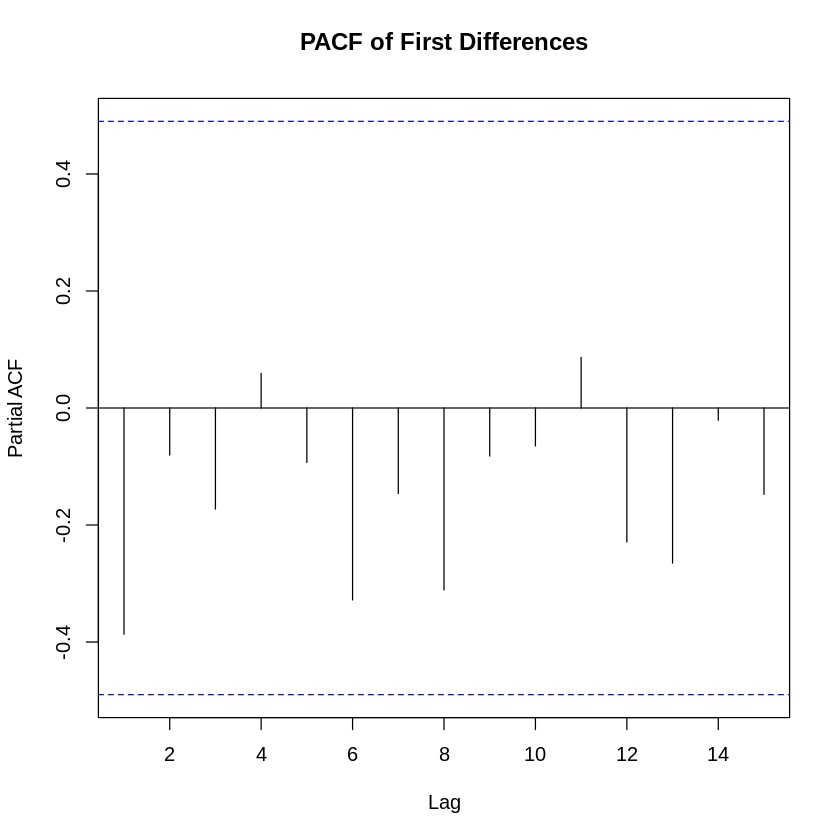

In [ ]:
# Calculate first differences
diff_total_demand <- diff(demand_ts)

# Plot the first differences
plot(diff_total_demand, main = "First Differences of Total Demand", ylab = "Differences")

# Plot ACF and PACF
acf(diff_total_demand,lag.max = 50, main = "ACF of First Differences")
pacf(diff_total_demand,lag.max = 50, main = "PACF of First Differences")

# Augmented Dickey-Fuller Test
adf_test <- adf.test(diff_total_demand, alternative = "stationary")
print(adf_test)

# KPSS Test
kpss_test <- kpss.test(diff_total_demand)
print(kpss_test)

In [ ]:
# diff_total_demand contains the first differences of demand_ts, so we calculate the second differences
second_diff_total_demand <- diff(diff_total_demand)

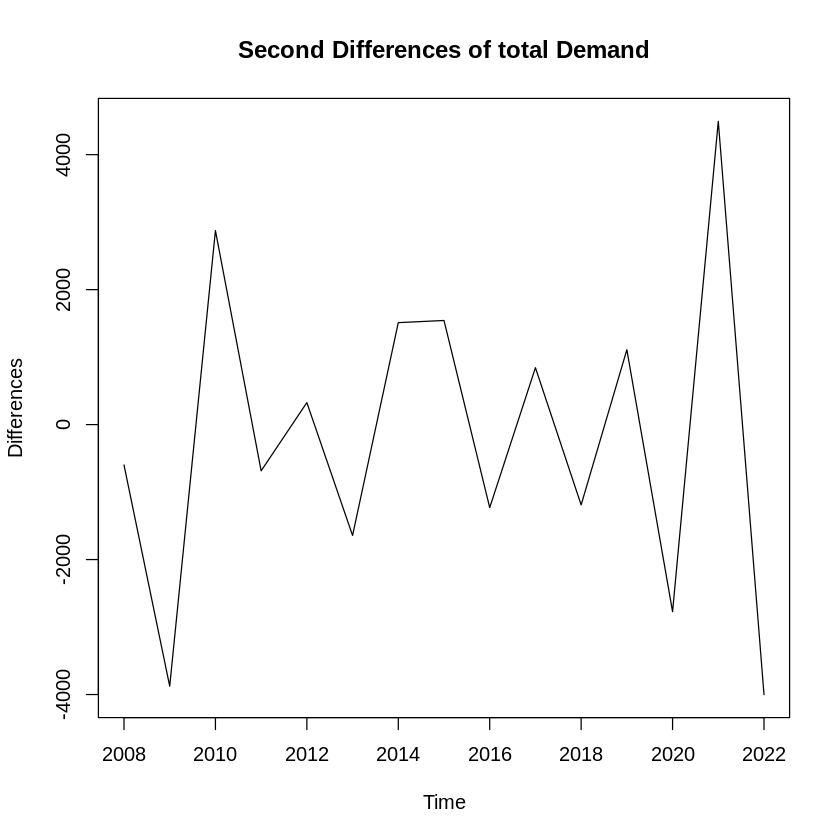

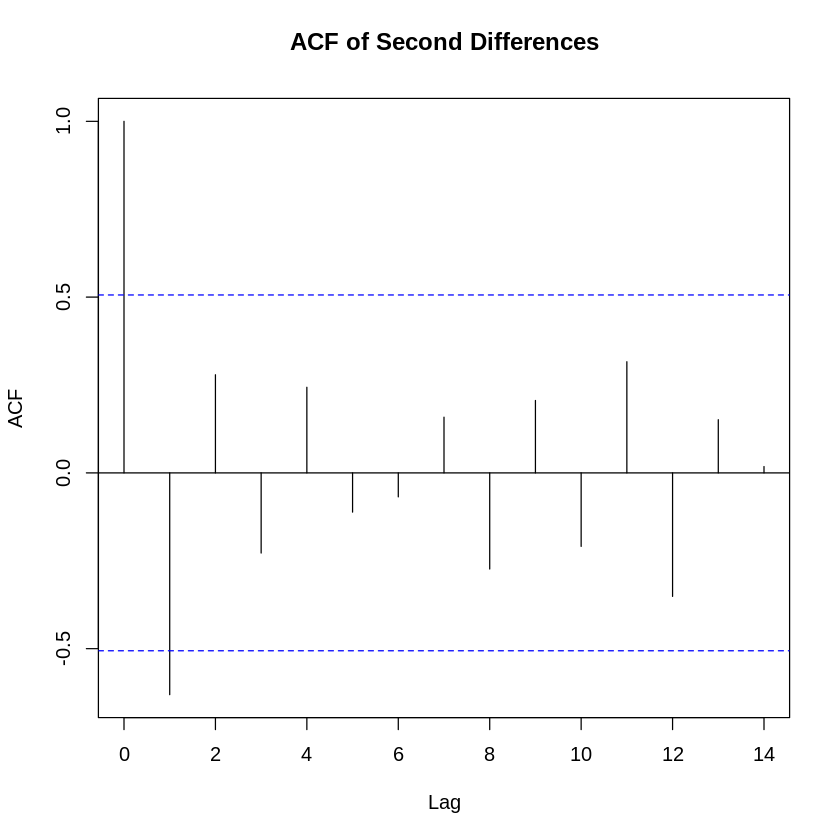


	Augmented Dickey-Fuller Test

data:  second_diff_total_demand
Dickey-Fuller = -4.1942, Lag order = 2, p-value = 0.01648
alternative hypothesis: stationary



Warning message in kpss.test(second_diff_total_demand):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  second_diff_total_demand
KPSS Level = 0.11298, Truncation lag parameter = 2, p-value = 0.1



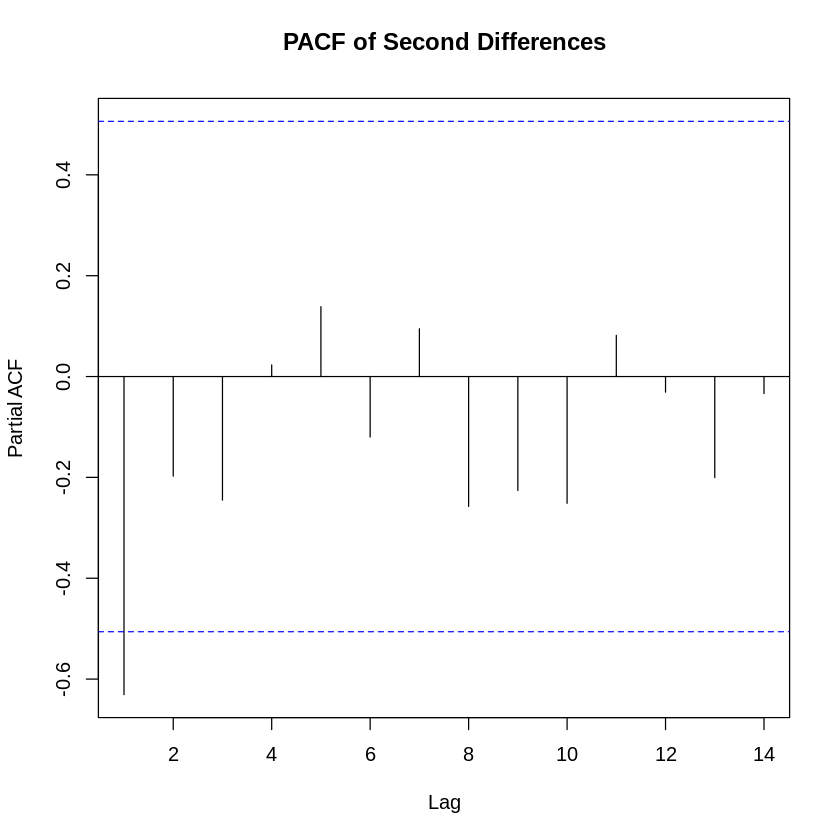

In [ ]:
# Plot the second differences
plot(second_diff_total_demand, main = "Second Differences of total Demand", ylab = "Differences")

# Plot ACF and PACF
acf(second_diff_total_demand,lag.max = 50, main = "ACF of Second Differences")
pacf(second_diff_total_demand,lag.max = 50, main = "PACF of Second Differences")

# Augmented Dickey-Fuller Test
adf_test <- adf.test(second_diff_total_demand, alternative = "stationary")
print(adf_test)

# KPSS Test
kpss_test <- kpss.test(second_diff_total_demand)
print(kpss_test)

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)

In [ ]:
# Use the auto.arima function in order to find the best ARIMA model for the electricity demand forecasting
best_arima_model <- auto.arima(demand_ts,stepwise = FALSE,approximation = FALSE,seasonal = FALSE,trace=TRUE)
summary(best_arima_model)
forecasts <- forecast(best_arima_model, h =2)
sarima_mse <- mean(best_arima_model$residuals^2)
sarima_mse


 ARIMA(0,1,0)                    : 279.5734
 ARIMA(0,1,0) with drift         : 281.9397
 ARIMA(0,1,1)                    : 279.8602
 ARIMA(0,1,1) with drift         : 281.5122
 ARIMA(0,1,2)                    : 282.7225
 ARIMA(0,1,2) with drift         : Inf
 ARIMA(0,1,3)                    : 286.3291
 ARIMA(0,1,3) with drift         : Inf
 ARIMA(0,1,4)                    : Inf
 ARIMA(0,1,4) with drift         : Inf
 ARIMA(0,1,5)                    : Inf
 ARIMA(0,1,5) with drift         : Inf
 ARIMA(1,1,0)                    : 279.6439
 ARIMA(1,1,0) with drift         : 282.0338
 ARIMA(1,1,1)                    : 282.7129
 ARIMA(1,1,1) with drift         : Inf
 ARIMA(1,1,2)                    : 286.3493
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(1,1,3)                    : 290.6913
 ARIMA(1,1,3) with drift         : Inf
 ARIMA(1,1,4)                    : Inf
 ARIMA(1,1,4) with drift         : Inf
 ARIMA(2,1,0)                    : 282.7165
 ARIMA(2,1,0) with drift         : 285.402

Series: demand_ts 
ARIMA(0,1,0) 

sigma^2 = 1968325:  log likelihood = -138.64
AIC=279.29   AICc=279.57   BIC=280.06

Training set error measures:
                    ME     RMSE    MAE        MPE     MAPE      MASE       ACF1
Training set -167.9649 1361.081 1067.8 -0.3560583 2.045247 0.9439636 -0.3727314

[1] 1852541

In [ ]:
# We now try to find manually if there is another better ARIMA parameter combination
p <- 1  # non-seasonal AR order
d <- 2  # non-seasonal differencing
q <- 1  # non-seasonal MA order
P <- 0  # seasonal AR order
D <- 0  # seasonal differencing
Q <- 0  # seasonal MA order
S <- 12 # the number of periods in one season (e.g., 12 for monthly data)

# Fit the SARIMA model
arima_model <- Arima(demand_ts, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S,approximation = FALSE,seasonal = FALSE))
summary(arima_model)
arima_mse_e <- mean(arima_model$residuals^2)
arima_mse_e
forecasts <- forecast(arima_model, h = 6)

Series: demand_ts 
ARIMA(1,2,1) 

Coefficients:
          ar1     ma1
      -0.3937  -1.000
s.e.   0.2505   0.234

sigma^2 = 1960389:  log likelihood = -130.66
AIC=267.32   AICc=269.5   BIC=269.44

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE     MASE       ACF1
Training set -199.9452 1224.386 908.459 -0.3797425 1.746968 0.803102 0.07614935

[1] 1499121

The next step is to check if the residuals of the selected model are white noise


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 1.6166, df = 3, p-value = 0.6556

Model df: 2.   Total lags used: 5



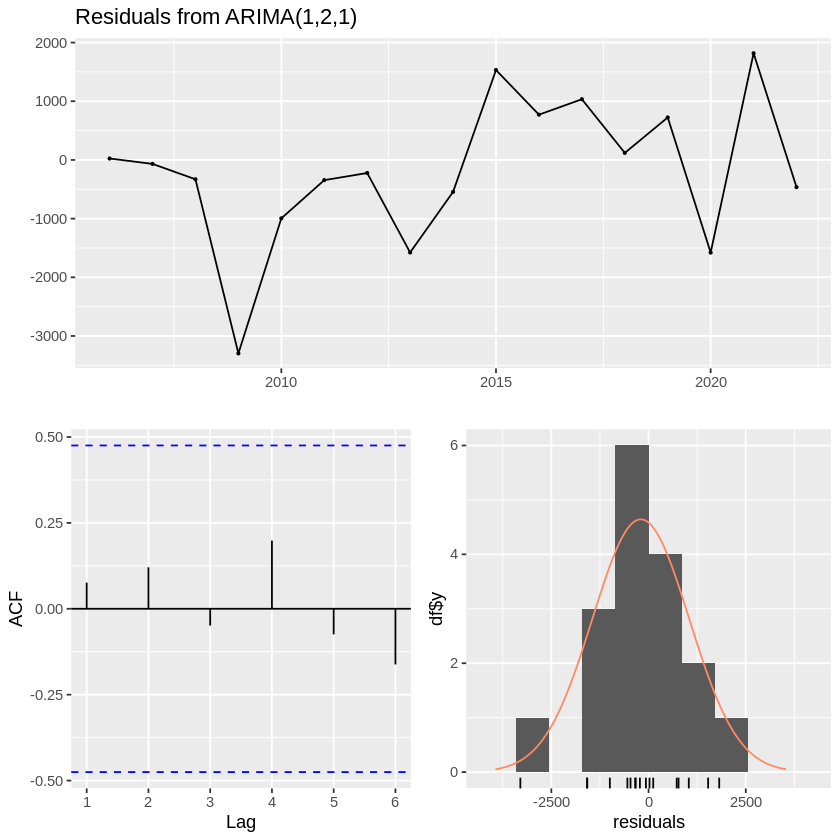

In [ ]:
checkresiduals(arima_model)

In [ ]:
mean(residuals(arima_model))

[1] -199.9452

In [ ]:
sd(residuals(arima_model))

[1] 1245.126

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1]  4 16


	Shapiro-Wilk normality test

data:  residuals(arima_model)
W = 0.95488, p-value = 0.538


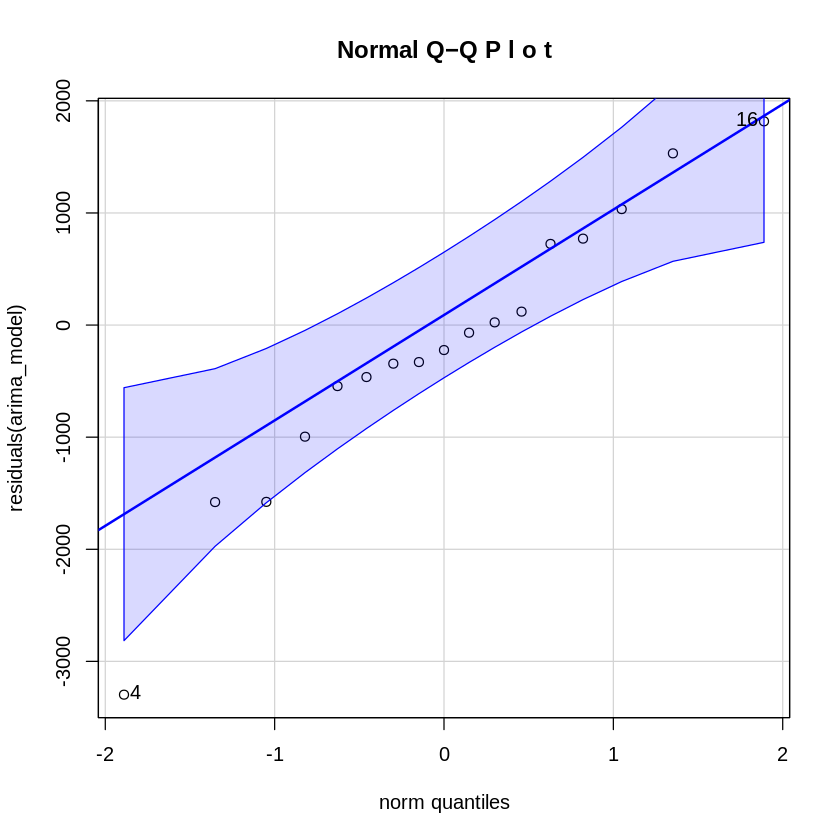

In [ ]:
qqPlot(residuals(arima_model),main=" Normal Q−Q P l o t " )

shapiro.test(residuals(arima_model))

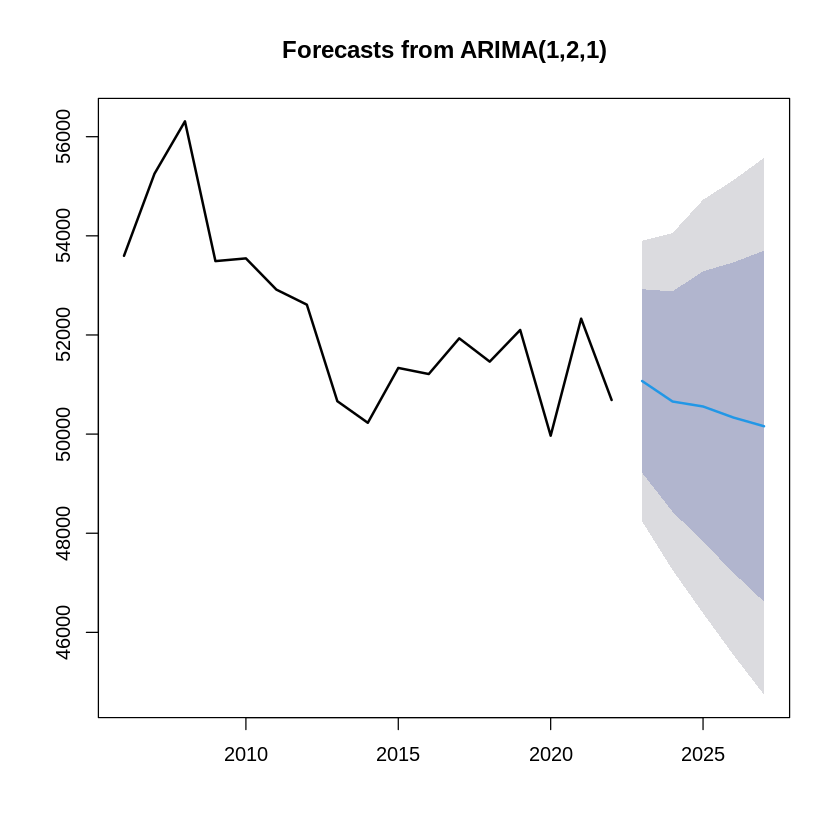

In [ ]:
forecasted_values <- forecast(arima_model,h=5)

# Plot the historical data and forecasts
plot(forecasted_values,lwd=2)


In [ ]:
forecasted_values

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2023       51071.04 49219.49 52922.59 48239.34 53902.74
2024       50657.19 48434.28 52880.10 47257.55 54056.83
2025       50557.09 47829.74 53284.43 46385.98 54728.19
2026       50333.45 47201.18 53465.73 45543.05 55123.86
2027       50158.46 46617.75 53699.17 44743.41 55573.51

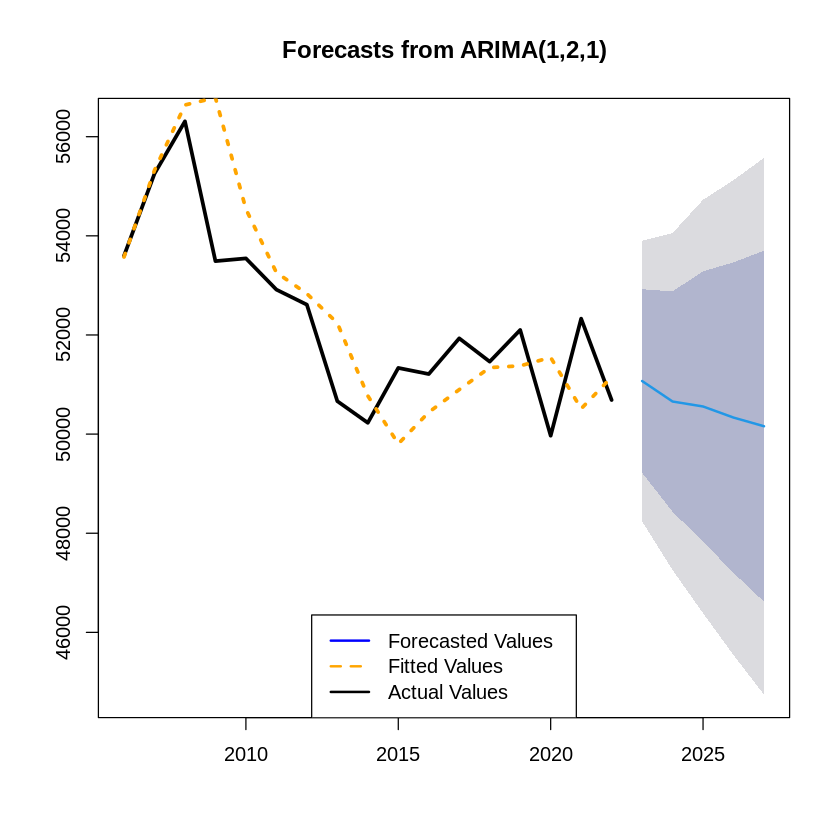

In [ ]:
# Plot the historical data and forecasts
plot(forecasted_values, lwd=3)

# Extract and add the fitted values
fitted_values <- fitted(arima_model)
lines(fitted_values, col="orange", lty=3, lwd=3)

# Add a legend at the top of the plot
legend("bottom",
       legend=c("Forecasted Values", "Fitted Values","Actual Values"),
       col=c("blue", "orange","black"),
       lty=c(1, 2),
       lwd=c(2, 2),
       cex=1)